<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/predicting-anime-using-machine-learning?scriptVersionId=105648446" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting the quotes with the help of Machine Learning and Deep Learning.

<span style="color:crimson;"> In this notebook we will try to go through and understand the Natural language processing task at a basic level , we will be going to ues two dataset for this tasks, because of the smaller dataset , it will be merged into another dataset of the same type, our task is to build the machine learning model which can able to predict the type of anime based on the quote and character. </span>

In [1]:
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset into the columns
data = pd.read_csv('../input/anime-quotes/AnimeQuotes.csv')

In [3]:
data.shape

(121, 3)

In [4]:
data.head()

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quote      121 non-null    object
 1   Character  121 non-null    object
 2   Anime      120 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [6]:
data.Anime.value_counts().head(10)

Attack on Titan                      12
Naruto                               10
Haikyuu                              10
One Piece                             7
Fairy Tail                            5
Bleach                                3
Rurouni Kenshin                       3
One Punch Man                         3
A Place Further than the Universe     3
Log Horizon                           3
Name: Anime, dtype: int64

In [7]:
genre = pd.DataFrame(data.Anime.value_counts().head(10))
#Genre = pd.DataFrame(genre)

In [8]:
genre

,Anime
Attack on Titan,12
Naruto,10
Haikyuu,10
One Piece,7
Fairy Tail,5
Bleach,3
Rurouni Kenshin,3
One Punch Man,3
A Place Further than the Universe,3
Log Horizon,3


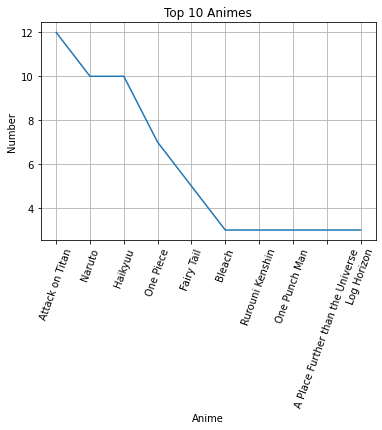

In [9]:
import matplotlib.pyplot as plt


plt.plot(genre)
plt.xlabel("Anime")
plt.ylabel("Number")
plt.title("Top 10 Animes")
plt.xticks(rotation=70)
plt.grid(True)
plt.show()

# ** Starting off Analysis with the second dataset

In [10]:
data2 = pd.read_csv('../input/anime-quotes-dataset/lessreal-data.csv',delimiter=';', skiprows=0, low_memory=False)

In [11]:
data2.head()

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data2.shape

(8760, 12)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           8494 non-null   object
 1   Anime        8436 non-null   object
 2   Character    8366 non-null   object
 3   Quote        8356 non-null   object
 4   Unnamed: 4   2 non-null      object
 5   Unnamed: 5   1 non-null      object
 6   Unnamed: 6   1 non-null      object
 7   Unnamed: 7   1 non-null      object
 8   Unnamed: 8   1 non-null      object
 9   Unnamed: 9   1 non-null      object
 10  Unnamed: 10  1 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 821.4+ KB


In [14]:
data2.isnull().sum()

ID              266
Anime           324
Character       394
Quote           404
Unnamed: 4     8758
Unnamed: 5     8759
Unnamed: 6     8759
Unnamed: 7     8759
Unnamed: 8     8759
Unnamed: 9     8759
Unnamed: 10    8759
Unnamed: 11    8759
dtype: int64

In [15]:
data2.drop(data2.iloc[:,4:12],axis=1,inplace=True) #so here we have removed the unnecesary rows from our dataset to make it more cleaner

In [16]:
data2.head()

,ID,Anime,Character,Quote
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...


In [17]:
data2.drop(['ID'],axis=1)

,Anime,Character,Quote
0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),Lacus Clyne,Is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),Kira Yamato,"What can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),C.C.,Do you know why snow is white..? Because it fo...
8758,(Tengen Toppa Gurren Lagann),Kamina,Don't believe in yourself. Believe in ME who b...


# Cleaning the dataset 

In [18]:
import nltk
import re
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.feature_extraction.text import TfidfTransformer , CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from scipy import sparse
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

print("All the packages and libraries are load")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


All the packages and libraries are load


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
data2.head()

,ID,Anime,Character,Quote
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8494 non-null   object
 1   Anime      8436 non-null   object
 2   Character  8366 non-null   object
 3   Quote      8356 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


In [21]:
data2['Quote'] = data2['Quote'].astype('string')

In [22]:
data2['Anime'] = data2['Anime'].astype('string')

In [23]:
data2['Character'] = data2['Character'].astype('string')

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8494 non-null   object
 1   Anime      8436 non-null   string
 2   Character  8366 non-null   string
 3   Quote      8356 non-null   string
dtypes: object(1), string(3)
memory usage: 273.9+ KB


In [25]:
data2.isnull().mean()*100

ID           3.036530
Anime        3.698630
Character    4.497717
Quote        4.611872
dtype: float64

In [26]:
 data3 = data2.dropna(axis=0,inplace=False)

In [27]:
data3.isnull().sum()

ID           0
Anime        0
Character    0
Quote        0
dtype: int64

In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8356 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8356 non-null   object
 1   Anime      8356 non-null   string
 2   Character  8356 non-null   string
 3   Quote      8356 non-null   string
dtypes: object(1), string(3)
memory usage: 326.4+ KB


# Preping the dataset

In [29]:
data3['Quote'] = data3['Quote'].map(lambda x : x.lower()) 

In [30]:
data3['Character'] = data3['Character'].map(lambda x : x.lower())

In [31]:
data3['Anime'] = data3['Anime'].map(lambda x : x.lower())

In [32]:
data3.head()

,ID,Anime,Character,Quote
0,0,(soul eater),soul eater,in the end the shape and form don't matter at ...
1,1,(relife),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,2,(psycho-pass extended edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,3,(naruto),pain,because of the existence of love - sacrifice i...
4,4,(detective conan),ran mouri,courage is a word of justice. it means the qua...


In [33]:
data4 = data3.drop('ID',axis=1)

In [34]:
data4.head()

,Anime,Character,Quote
0,(soul eater),soul eater,in the end the shape and form don't matter at ...
1,(relife),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,(psycho-pass extended edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,(naruto),pain,because of the existence of love - sacrifice i...
4,(detective conan),ran mouri,courage is a word of justice. it means the qua...


# Merging the dataset into one dataframe

Though the other dataset is kind of irrelevant because of the smaller size of rows and columns available in it but still we will going to consider it and try to merge it in this dataframe before making it the final one.

In [35]:
data4.head()

,Anime,Character,Quote
0,(soul eater),soul eater,in the end the shape and form don't matter at ...
1,(relife),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,(psycho-pass extended edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,(naruto),pain,because of the existence of love - sacrifice i...
4,(detective conan),ran mouri,courage is a word of justice. it means the qua...


In [36]:
data.head()

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quote      121 non-null    object
 1   Character  121 non-null    object
 2   Anime      120 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [38]:
data['Quote'] = data['Quote'].astype('string')
data['Character'] = data['Character'].astype('string')
data['Anime'] = data['Anime'].astype('string')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quote      121 non-null    string
 1   Character  121 non-null    string
 2   Anime      120 non-null    string
dtypes: string(3)
memory usage: 3.0 KB


In [40]:
frames = [data,data4] 

In [41]:
new_data = pd.concat(frames)

In [42]:
new_data.head()

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers


In [43]:
new_data.isnull().sum()

Quote        0
Character    0
Anime        1
dtype: int64

In [44]:
new_data.dropna(axis=0,inplace=True)

In [45]:
new_data.shape #we have successfully merged the two dataset into one , and now will be starting off with the model building and data preping.

(8476, 3)

In [46]:
new_data['Anime'] = new_data['Anime'].map(lambda x : x.lower())
new_data['Character'] = new_data['Character'].map(lambda x : x.lower())
new_data['Quote'] = new_data['Quote'].map(lambda x : x.lower())

In [47]:
new_data.head()

,Quote,Character,Anime
0,"people’s lives don’t end when they die, it end...",itachi uchiha,naruto
1,"if you don’t take risks, you can’t create a fu...",monkey d luffy,one piece
2,"if you don’t like your destiny, don’t accept it.",naruto uzumaki,naruto
3,"when you give up, that’s when the game ends.",mitsuyoshi anzai,slam dunk
4,all we can do is live until the day we die. co...,deneil young,uchuu kyoudai or space brothers


# Implementing the pipeline to clean the text.

#  **Removing Puntuations**

In [48]:
new_data['Quote'] = new_data['Quote'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) #Removes numbers
new_data['Quote'] = new_data['Quote'].apply(lambda x: re.sub('\s+[a-zA-Z]\s+', ' ', x)) # Removes single characters
new_data['Quote'] = new_data['Quote'].apply(lambda x: re.sub('\s+', ' ', x))

# **Going with the tokenization**

<pre>
we will try to understand how many types of tokenization is done when the dataset if feeded into the model, it is very important that you should get his process right because tokens are the building blocks of Natural language processing.
</pre>

Tokenization is the process of breaking or seperating the text into the smaller units called the tokens.Because of which it can be characterised into 3 types which are -
1. Words 
2. Character
3. subwords

*Tokenization is important because creating vocabulary is the ultimate goal of tokenization.*

# Types of Tokenization

* Word Tokenization is the most commonly used tokenization algorithm. It splits a piece of text into individual words based on a certain delimiter. Depending upon delimiters, different word-level tokens are formed. Pretrained Word Embeddings such as Word2Vec and GloVe comes under word tokenization.

* Character Tokenization splits apiece of text into a set of characters. It overcomes the drawbacks we saw above about Word Tokenization.

[If you want to know more about the topic definatily check out this link!](https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/)

In [49]:
new_data['Quote'] = new_data['Quote'].apply(lambda x: word_tokenize(x))
new_data['Character'] = new_data['Character'].apply(lambda x: word_tokenize(x))
new_data['Anime'] = new_data['Anime'].apply(lambda x: word_tokenize(x))

In [50]:
new_data.head()

,Quote,Character,Anime
0,"[people, lives, don, end, when, they, die, it,...","[itachi, uchiha]",[naruto]
1,"[if, you, don, take, risks, you, can, create, ...","[monkey, d, luffy]","[one, piece]"
2,"[if, you, don, like, your, destiny, don, accep...","[naruto, uzumaki]",[naruto]
3,"[when, you, give, up, that, when, the, game, e...","[mitsuyoshi, anzai]","[slam, dunk]"
4,"[all, we, can, do, is, live, until, the, day, ...","[deneil, young]","[uchuu, kyoudai, or, space, brothers]"


# Removing Stopwords

In [51]:
stopwords = nltk.corpus.stopwords.words('english')

In [52]:
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords]
    return text

In [53]:
new_data['Quote'] = new_data['Quote'].apply(lambda x: remove_stopwords(x))

In [54]:
new_data.head()

,Quote,Character,Anime
0,"[people, lives, end, die, ends, lose, faith]","[itachi, uchiha]",[naruto]
1,"[take, risks, create, future]","[monkey, d, luffy]","[one, piece]"
2,"[like, destiny, accept]","[naruto, uzumaki]",[naruto]
3,"[give, game, ends]","[mitsuyoshi, anzai]","[slam, dunk]"
4,"[live, day, die, control, fly, free]","[deneil, young]","[uchuu, kyoudai, or, space, brothers]"


# Stemming 

In [55]:
from nltk.stem.snowball import SnowballStemmer

stemming_eng = SnowballStemmer("english")

In [56]:
def stemming(tokenized_text):
    text = [stemming_eng.stem(word) for word in tokenized_text]
    return text

In [57]:
new_data_1 = new_data.copy()

In [58]:
new_data_1['Quote'] = new_data_1['Quote'].apply(lambda x: stemming(x)) 

In [59]:
new_data.head()

,Quote,Character,Anime
0,"[people, lives, end, die, ends, lose, faith]","[itachi, uchiha]",[naruto]
1,"[take, risks, create, future]","[monkey, d, luffy]","[one, piece]"
2,"[like, destiny, accept]","[naruto, uzumaki]",[naruto]
3,"[give, game, ends]","[mitsuyoshi, anzai]","[slam, dunk]"
4,"[live, day, die, control, fly, free]","[deneil, young]","[uchuu, kyoudai, or, space, brothers]"


*Here we need to understand the difference between the stemming and lemmatization because there can be trade-off between the accuracy when used either of them , stemming is fast process but it is also very brutal whereas the lemmatization is typically more accurate than stemming because the original meaning of the word is preserved.*

# Lemmatization

In [60]:
#import ntlk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob , Word, Blobber
from textblob.taggers import NLTKTagger

w = nltk.WordNetLemmatizer()

In [61]:
def lemmatization(tokenized_text):
    text_lemma = [w.lemmatize(word) for word in tokenized_text]
    return text_lemma

#this type of functions works when we need to work with the list dataset.

In [62]:
new_data['Quote'] = new_data['Quote'].apply(lambda x: lemmatization(x))

In [63]:
new_data.head()

,Quote,Character,Anime
0,"[people, life, end, die, end, lose, faith]","[itachi, uchiha]",[naruto]
1,"[take, risk, create, future]","[monkey, d, luffy]","[one, piece]"
2,"[like, destiny, accept]","[naruto, uzumaki]",[naruto]
3,"[give, game, end]","[mitsuyoshi, anzai]","[slam, dunk]"
4,"[live, day, die, control, fly, free]","[deneil, young]","[uchuu, kyoudai, or, space, brothers]"


**we are going with the Lemmatization over stemming.**

In [64]:
new_data['Quote'] = new_data['Quote'].apply(lambda x: " ".join(x))
new_data['Character'] = new_data['Character'].apply(lambda x: " ".join(x))
new_data['Anime'] = new_data['Anime'].apply(lambda x: " ".join(x))

In [65]:
new_data.head()

,Quote,Character,Anime
0,people life end die end lose faith,itachi uchiha,naruto
1,take risk create future,monkey d luffy,one piece
2,like destiny accept,naruto uzumaki,naruto
3,give game end,mitsuyoshi anzai,slam dunk
4,live day die control fly free,deneil young,uchuu kyoudai or space brothers


# Reduction of labels

In [66]:
new_data['Anime'].value_counts().head()

( naruto )          504
( bleach )          421
( one piece )       207
( soul eater )      196
( kuroshitsuji )    187
Name: Anime, dtype: int64

In [67]:
new_data_2 =  new_data[new_data['Anime'].isin(['( naruto )','( bleach )','( one piece )','( soul eater )','( kuroshitsuji )'])]

# new_data['Anime'].isin(['naruto','bleach'])

In [68]:
#new_data[new_data['Anime'].isin(['( naruto )'])].shape
new_data_2.shape

(1515, 3)

# Vectorizing Raw Data : Count Vectorization.

I think I should have done it  previosuly, but I will be doing it now. I should have merged both the features columns into one instead of apply in different methods seperately. But I will be merging them now. 

In [69]:
#combining the columns of the dataframe
new_data_2['features'] = new_data_2['Quote'] + new_data_2['Character']
new_data_2.pop('Quote')
new_data_2.pop('Character')

0                  soul eater
3                        pain
44            zaraki kenpachi
59      donquixote doflamingo
60      donquixote doflamingo
                ...          
8749                    gaara
8750                 rock lee
8751           hatake kakashi
8752             abarai renji
8754          kurosaki ichigo
Name: Character, Length: 1515, dtype: object

In [70]:
new_data_2.shape

(1515, 2)

In [71]:
new_data_2.head()

,Anime,features
0,( soul eater ),end shape form matter soul matter right nothin...
3,( naruto ),existence love sacrifice born well hate one co...
44,( bleach ),even interesting fighting someone goalzaraki k...
59,( one piece ),right whatever tragedy blunder thing actually ...
60,( one piece ),weaker person get hung people pain self destru...


In [72]:
quotes = new_data_2.drop('Anime',axis=1)
anime = new_data['Anime']

In [73]:
#we will be using the tfid vectorizer in order to vectorize our dataset
from sklearn.feature_extraction.text import TfidfTransformer , CountVectorizer

tfidf = TfidfVectorizer()

features = tfidf.fit_transform(new_data_2['features'])
print("The shape of the feature vector is {}".format(features.shape))

The shape of the feature vector is (1515, 4771)


# Work In Progress